In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [5]:
def wrangle(file):
    
    #read csv into dataframe
    df = pd.read_csv(file)
    
    #split columns
    df[
        [
        "fixed acidity","volatile acidity", "citric acid","residual sugar","chlorides", "free sulfur dioxide","total sulfur dioxide","density", "pH","sulphates","alcohol","quality"
        ]
    ] = df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True).astype(float)
    #columns to drop
    cols_to_drop = []
    #drop column
    
    orig_column = 'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'
    cols_to_drop.append(orig_column)
    
    #recast column
    df['quality_class'] = (df['quality'] > 6).astype(int)
    
    #drop leaky features
    cols_to_drop.append('quality')

    #drop multicollinearity
    collinear= ['residual sugar', 'density','free sulfur dioxide']
    cols_to_drop.extend(collinear)


    #drop columns
    df.drop(columns=cols_to_drop, inplace=True)

    return df

In [6]:
df = wrangle('winequality-white.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality_class
0,7.0,0.27,0.36,0.045,170.0,3.00,0.45,8.8,0
1,6.3,0.30,0.34,0.049,132.0,3.30,0.49,9.5,0
2,8.1,0.28,0.40,0.050,97.0,3.26,0.44,10.1,0
3,7.2,0.23,0.32,0.058,186.0,3.19,0.40,9.9,0
4,7.2,0.23,0.32,0.058,186.0,3.19,0.40,9.9,0


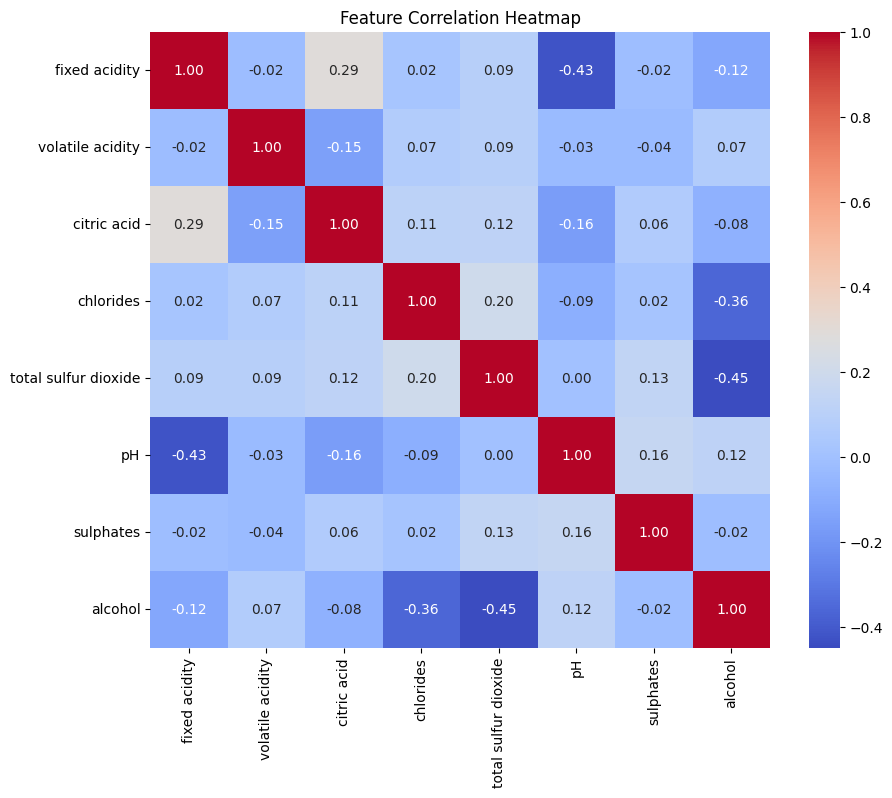

In [7]:
plt.figure(figsize=(10, 8))
correlation = df.drop(columns='quality_class').corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

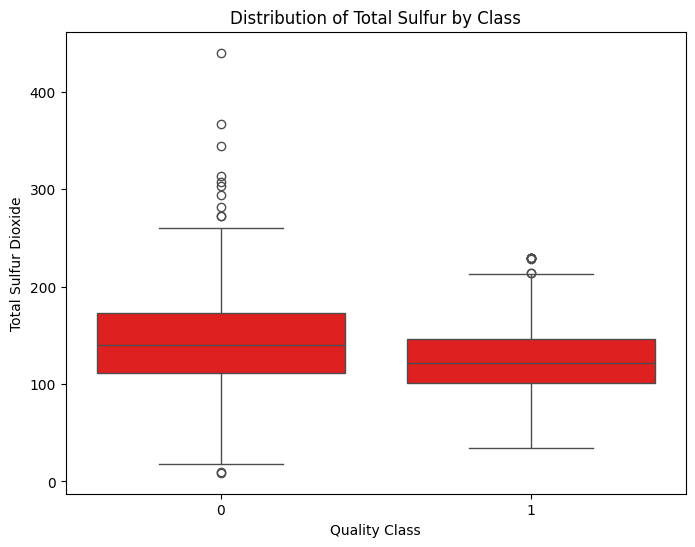

In [8]:
#check obvious differences in quality
plt.figure(figsize=(8,6))
sns.boxplot(x='quality_class', y='total sulfur dioxide', data=df, color='red')
plt.xlabel('Quality Class')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Distribution of Total Sulfur by Class');

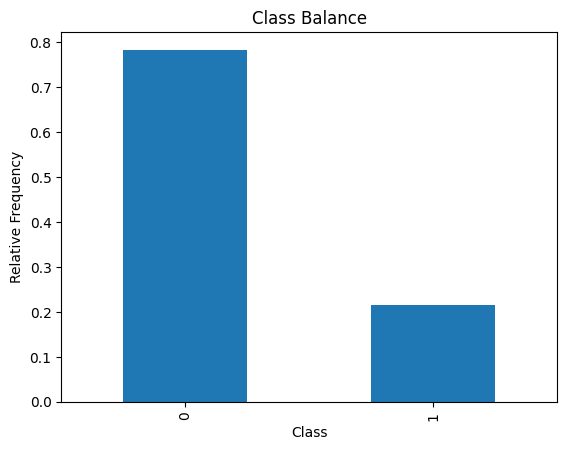

In [9]:
#check distribution of target 
df['quality_class'].value_counts(normalize=True).plot(kind='bar', xlabel="Class", ylabel='Relative Frequency', title='Class Balance');

In [11]:
#get class balance
majority_class_prop, minority_class_prop = df['quality_class'].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.7835851367905268 0.21641486320947326


In [ ]:
#for a categorical variable; get pivot table
#pivot_t= pd.pivot_table(df, index='cat_var', values=target, aggfunc=np.mean).sort_values(by=target)
#pivot_t.plot(kind=bar)
#plt.axvline(majority_class, linestyle='--', color='red',  label=Majority class)
#plt.axvline(minority_class, linestyle='--', color='red',  label=Minority class)

In [12]:
#check cardinaility
df.select_dtypes('object').nunique()

Series([], dtype: float64)

In [13]:
#feature and target
X = df.drop('quality_class', axis=1)
y = df['quality_class']

In [16]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)


X_train Shape: (3918, 8)
X_test Shape: (980, 8)
y_train: (3918,)
y_test: (980,)


In [23]:
#baseline model
baseline_accuracy = y_train.value_counts(normalize=True).max()
print('baseline_accuracy:', round(baseline_accuracy,2))

baseline_accuracy: 0.79
